In [1]:
import os
import glob
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

from scipy import signal
from scipy.fft import fft, fftfreq


import sys
sys.path.insert(0,'..')


from clim_functions.datetime360 import *
from SSW_metrics.get_SSWs import *
from clim_functions.mean_lat_weighted import mean_lat_weighted


In [9]:
basedir = os.environ['SCRATCH']+'/MiMA/runs/'
rundir = basedir + '033/'   # The control run, length=3600 days
run = 'control'

start_ind = 0   # No spin up
runtime = 3600  # Run time should be 10 yr in this test example
headers = ['Run ID', 'std20', 'std77', 'period', 'std20_var', 'std77_var', 'period_var']

print("Reading atmos_daily.nc from ", rundir)

filename = 'atmos_daily'
try:
    dataset = nc.Dataset(rundir+filename+'.nc', 'r')
except IOError as e:
    print(e)
    exit()

time = dataset['time']
# Check length is 3600
if len(time)!= runtime:
    print("Incomplete data, run time = {}, should be {}".format(len(time),runtime) )
    exit()

pfull = dataset['pfull']
ucomp = dataset['ucomp']
lat = dataset['lat']

Reading atmos_daily.nc from  /scratch/users/lauraman/MiMA/runs/033/


In [10]:
# Extract zonal mean u at 10hPa, 60N (59.99702 - 62.787354)
model_level = 13
lat_level = 53
u10at60 = mean_lat_weighted(ucomp[:, model_level, 53:55, :].mean(axis=(-1)), 
                            lat[53:55], axis=(-1) )    # Zonal mean

time = dataset['time'][:]


In [11]:
datelist = datetime360(time)

In [12]:
ssws, spvs = get_SSWs(u10at60, datelist)

1  YEAR:  20
PV init on day  47 . Final warming on day  292
 SPV SATISFIED
2  YEAR:  21
PV init on day  38 . Final warming on day  296
!!! SSW !!! on day 261 . Days after previous +ve wind:  223 . Days until final warming: 258
 SPV SATISFIED
 SPV SATISFIED
3  YEAR:  22
PV init on day  41 . Final warming on day  285
!!! SSW !!! on day 185 . Days after previous +ve wind:  144 . Days until final warming: 244
!!! SSW !!! on day 208 . Days after previous +ve wind:  22 . Days until final warming: 99
 SPV SATISFIED
4  YEAR:  23
PV init on day  38 . Final warming on day  310
 SPV SATISFIED
 SPV SATISFIED
5  YEAR:  24
PV init on day  52 . Final warming on day  306
 SPV SATISFIED
6  YEAR:  25
PV init on day  38 . Final warming on day  267
 SPV SATISFIED
7  YEAR:  26
PV init on day  36 . Final warming on day  282
!!! SSW !!! on day 165 . Days after previous +ve wind:  129 . Days until final warming: 246
!!! SSW !!! on day 217 . Days after previous +ve wind:  47 . Days until final warming: 112
8  

In [13]:
n_ssws = len(ssws)
print("N_SSWs = {} in {} years".format(n_ssws, len(time)/360.))

N_SSWs = 7 in 10.0 years


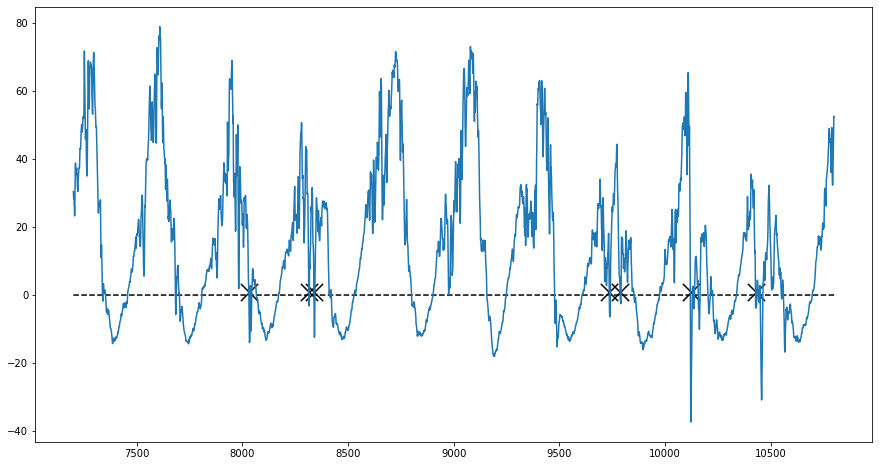

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(time, np.zeros(len(u10at60)), 'k--')
plt.plot(time, u10at60)
plt.scatter(np.array(ssws), np.ones(len(ssws)), marker = 'x', color='k', s=300)


In [15]:
ssws

[8032.0, 8316.0, 8339.0, 9736.0, 9788.0, 10120.0, 10428.0]